In [2]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
raw_data = pd.read_csv("anonymized_data.csv")

In [4]:
raw_data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [6]:
#Removing the label column
removed_label_data = raw_data.drop('Label',axis=1)

In [7]:
removed_label_data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,WDRT,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,4.048589,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,4.341376,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,4.028944,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,3.974559,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,3.799633,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362


In [8]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

In [9]:
MMS = MinMaxScaler()

In [10]:
Scaled_data = MMS.fit_transform(removed_label_data)

In [12]:
Scaled_data

array([[0.        , 0.26590249, 0.19337622, ..., 0.76146479, 0.89187148,
        0.69449859],
       [0.78003243, 0.82101815, 0.86384145, ..., 0.13118915, 0.14173837,
        0.18919308],
       [0.64909787, 0.85415725, 0.79583534, ..., 0.16350718, 0.12891497,
        0.18149351],
       ...,
       [0.98154196, 0.64205789, 0.74518214, ..., 0.04904853, 0.06277868,
        0.23240366],
       [0.74388166, 0.86176345, 0.75260151, ..., 0.19478426, 0.03890874,
        0.22364704],
       [0.77871175, 0.78883203, 0.78611589, ..., 0.17766076, 0.08887577,
        0.22545067]])

In [13]:
#The Linear AutoEncoder
from tensorflow.contrib.layers import fully_connected

In [14]:
num_inputs = 30 # Dimension of the data
num_hidden = 2 #Dimensional reduction to 2
num_outputs = num_inputs

In [15]:
learning_rate = 0.01

In [16]:
#Placeholder
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

In [17]:
#Layers
hidden = fully_connected(X,num_hidden,activation_fn=None)
output = fully_connected(hidden,num_outputs,activation_fn=None)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
#loss function
loss = tf.reduce_mean(tf.square(output-X))

In [19]:
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [20]:
#Initializing
init = tf.global_variables_initializer()

In [22]:
#Session
num_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        sess.run(train,feed_dict={X:Scaled_data})
    
    output_data2d = hidden.eval(feed_dict={X:Scaled_data})

In [23]:
output_data2d.shape

(500, 2)

In [25]:
output_data2d

array([[-0.67387235, -0.9398148 ],
       [ 1.5367264 , -0.8377657 ],
       [ 1.5805458 , -0.86844754],
       [-0.6764579 , -0.8294213 ],
       [-0.65407044, -0.88538575],
       [ 1.5279924 , -0.8948034 ],
       [ 1.4479504 , -0.8442712 ],
       [ 1.3818533 , -0.88983786],
       [-0.7031424 , -0.7983432 ],
       [-0.4726029 , -0.98813975],
       [-0.544116  , -1.0582976 ],
       [ 1.4678313 , -0.7773111 ],
       [ 1.5837708 , -0.5902029 ],
       [-0.6118929 , -0.9024954 ],
       [ 1.4940747 , -0.58552206],
       [-0.5515736 , -0.882498  ],
       [ 1.490169  , -0.6837132 ],
       [-0.647711  , -0.9259089 ],
       [ 1.5955461 , -0.90443003],
       [ 1.6213149 , -0.9446664 ],
       [ 1.5088967 , -0.65915465],
       [-0.49276495, -1.0914363 ],
       [ 1.3365551 , -0.7460549 ],
       [-0.6279035 , -0.8494898 ],
       [-0.55531687, -1.0710149 ],
       [-0.646694  , -0.95037436],
       [-0.7173784 , -0.899467  ],
       [ 1.5351219 , -0.7485235 ],
       [-0.6584897 ,

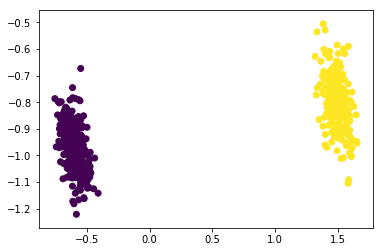

In [51]:
plt.scatter(output_data2d[:,0],output_data2d[:,1],c=raw_data['Label'])